In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
import warnings
warnings.filterwarnings("ignore")


In [22]:
data = pd.read_csv(r"C:\Users\athar\Downloads\Processed_final_data.csv")

In [23]:

class_names = np.array(["Healthy", "Broken"])
class_names

array(['Healthy', 'Broken'], dtype='<U7')

In [24]:
data.head()

,S1_F1,S1_F2,S1_F3,S1_F4,S1_F5,S1_F6,S1_F7,S1_F8,S1_F9,S1_F10,...,S4_F8,S4_F9,S4_F10,S4_F11,S4_F12,S4_F13,S4_F14,S4_F15,Load,Fault
0,67.588115,83.274425,89.333050,121.477569,162.415102,182.838358,218.546805,239.852535,253.000097,265.280812,...,173.572436,175.295667,176.191071,185.517841,187.536515,188.192385,188.461355,188.687097,0,0
1,51.920103,70.251762,89.979643,122.138222,158.690533,180.149196,201.690267,225.682263,277.222101,300.708606,...,160.143979,162.942691,164.470262,166.298464,169.680096,170.173318,170.492845,171.305015,0,0
2,65.583934,84.550628,92.836348,126.160038,176.341144,189.389240,245.691326,288.321549,333.154596,375.833766,...,181.657745,184.443174,189.387762,196.750294,205.404570,210.133893,210.633146,211.949243,0,0
3,80.441871,85.546586,96.707123,114.467412,195.486408,214.458322,235.078857,246.789397,369.131024,389.604178,...,213.006825,218.410803,220.534957,227.241842,230.573960,230.925187,231.236101,231.981461,0,0
4,50.654863,65.219062,83.301976,137.704902,179.048341,199.471501,248.377708,266.183093,311.872188,320.815023,...,172.625035,176.899814,177.922816,185.769808,188.740186,189.222100,191.066769,191.730304,0,0


In [25]:
data.tail()

,S1_F1,S1_F2,S1_F3,S1_F4,S1_F5,S1_F6,S1_F7,S1_F8,S1_F9,S1_F10,...,S4_F8,S4_F9,S4_F10,S4_F11,S4_F12,S4_F13,S4_F14,S4_F15,Load,Fault
5795,73.116409,117.610839,279.835523,348.827856,353.862430,355.598015,356.345107,356.799954,360.200633,365.465902,...,288.034646,293.911089,298.181605,305.140444,309.555066,310.124264,310.835332,311.495231,90,1
5796,92.368929,124.385276,230.614073,271.017877,276.936294,279.417285,280.983413,281.655223,287.606706,292.814461,...,359.199501,362.591770,366.860559,369.773471,374.916166,377.466607,379.766158,380.856720,90,1
5797,70.381160,86.248223,251.715934,273.662632,279.979730,282.170307,283.632061,284.194477,297.093597,301.515263,...,306.363391,317.381574,320.983072,326.237584,339.354633,341.716809,343.363735,344.201282,90,1
5798,83.715607,94.884157,206.974584,315.087217,320.785440,324.706701,325.445532,326.110413,329.890990,334.005594,...,267.485846,274.779587,277.337480,286.305007,292.071040,292.381945,292.809352,293.000889,90,1
5799,82.145167,98.950394,203.183441,259.909067,267.102350,268.118957,269.628699,270.250626,280.398841,284.607669,...,275.480031,283.127423,284.931213,286.642684,289.148290,289.722393,290.364609,290.577406,90,1


In [26]:
data.isnull().sum().sum()

0

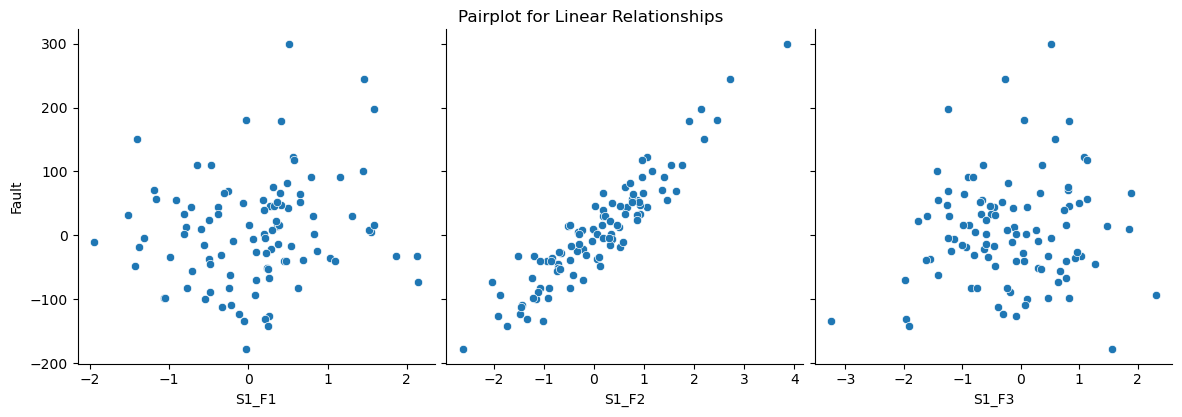

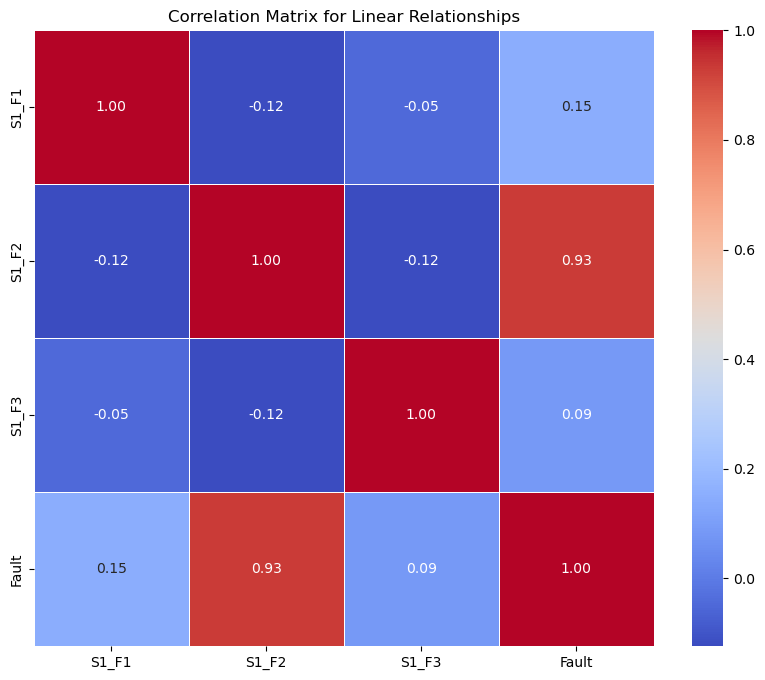

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generating random data for demonstration
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

# Creating a DataFrame
data = pd.DataFrame(X, columns=['S1_F1','S1_F2','S1_F3'])
data['Fault'] = y

# Pairplot for scatter plots and histograms
sns.pairplot(data, x_vars=['S1_F1','S1_F2','S1_F3'], y_vars=['Fault'], height=4)
plt.suptitle('Pairplot for Linear Relationships', y=1.02)
plt.show()

# Correlation matrix
correlation_matrix = data.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Linear Relationships')
plt.show()


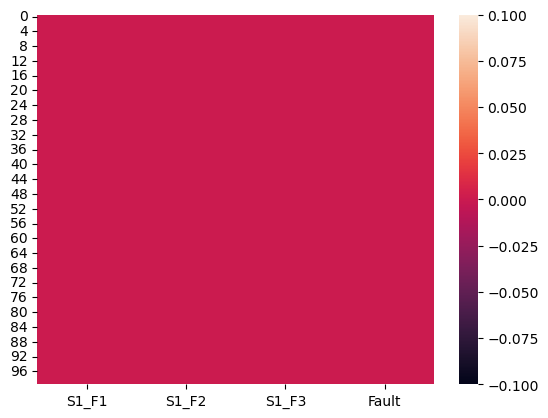

In [28]:
sns.heatmap(data.isnull())
plt.show()

In [29]:
# Function to split data into training and testing sets
def split_data(data):
    X = data.drop(["Fault"], axis=1)
    y = data["Fault"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    return X_train, X_test, y_train, y_test



In [30]:
# Function to train the Random Forest classifier
def train_random_forest(X_train, y_train):
    clf_rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
    clf_rf.fit(X_train, y_train)
    return clf_rf



In [31]:
# Function to take user input and make predictions
def predict_fault_status(user_input, trained_model, feature_columns):
    # Ensure user_input has the same length as the expected features
    if len(user_input) != len(feature_columns):
        raise ValueError("Invalid number of input values. Expected {} values.".format(len(feature_columns)))

    # Convert the user input into a DataFrame for prediction
    user_data = pd.DataFrame([user_input], columns=feature_columns)

    # Predict using the trained model
    user_prediction = trained_model.predict(user_data)

    return user_prediction[0]

# Assuming your original dataset is loaded into 'data'
# If you've already loaded the dataset in a previous cell, you can skip this step.
data = pd.read_csv(r"C:\Users\athar\Downloads\Processed_final_data.csv")

# Select the specified feature columns
selected_features = ['S1_F3', 'S1_F4', 'S1_F9', 'S1_F10', 'S1_F11', 'S1_F13', 'S2_F7', 'S2_F8', 'S2_F9', 'S2_F10']

# Convert 'Fault' into binary categorical variable
threshold = 0  # Set your threshold based on the actual data distribution
data['Fault'] = np.where(data['Fault'] > threshold, 1, 0)  # Use 1 for 'Broken' and 0 for 'Healthy'

# Extract selected features from the dataset
selected_data = data[['Fault'] + selected_features]

# Split the data
X_train, X_test, y_train, y_test = split_data(selected_data)

# Train Random Forest classifier
clf_rf = train_random_forest(X_train, y_train)

# Evaluate the accuracy on the testing set
y_pred = clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy on Testing Set: {:.2f}%".format(accuracy * 100))

# Take user input for vibrations
user_input_values = []
for feature in selected_features:
    user_input = float(input(f"Enter value for {feature}: "))
    user_input_values.append(user_input)

# Make prediction using user input
prediction = predict_fault_status(user_input_values, clf_rf, selected_features)

# Print the prediction
print("Predicted Fault Status: {}".format(prediction))
plot_confusion_matrix(y_test, y_predict, classes=class_names, title='Confusion matrix, without normalization')
plt.show()

Accuracy on Testing Set: 98.48%


ValueError: could not convert string to float: ''